In [27]:
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from  matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import scipy as sp

In [4]:
def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148
        X, y = datasets.make_blobs(n_samples=n_samples,
                          cluster_std=[1.0, 2.5, 0.5, 3.0],
                          random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X

[[-0.46889019 -3.11954435]
 [ 3.92549361 -7.22473722]
 [-0.04478871  0.78201734]]


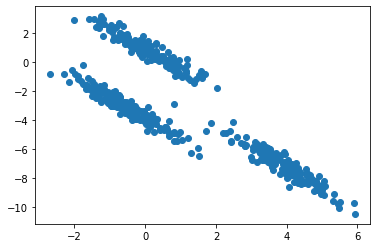

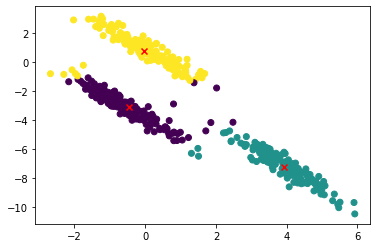

In [19]:
X=generate_data(500, 2)
plt.figure()
plt.scatter(X[:,0], X[:,1])

plt.figure()
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y_predict=kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_predict)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],marker='x', color="red")
print (centroids)


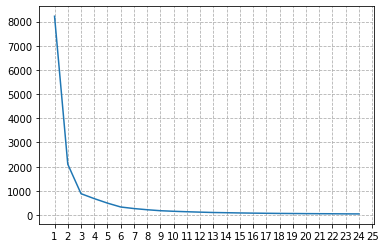

In [20]:
KF=[]
CL=[]

for i in range(1,25):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    CL.append(i)
    KF.append(kmeans.inertia_)

plt.figure()
plt.plot(CL, KF)
plt.xticks(np.arange(min(CL), max(CL)+2, 1))
plt.grid(linestyle='--')

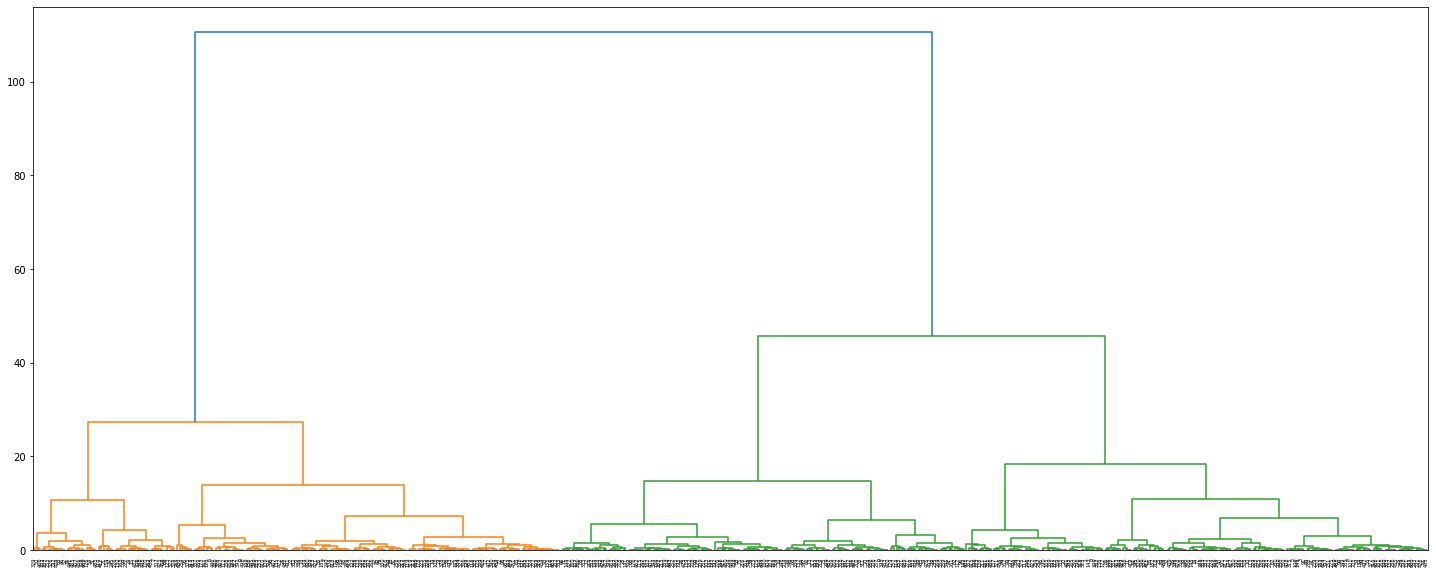

In [23]:
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

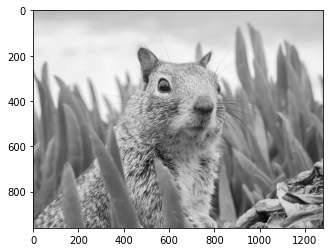

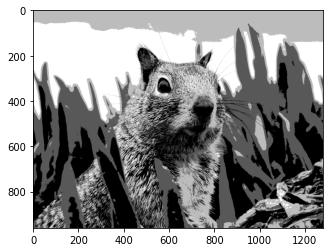

In [44]:

try:
    face = sp.face(gray=True)
except AttributeError:
    import matplotlib.image as mpimg
    face = mpimg.imread('example_grayscale.png')
    
X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=4,n_init=1)
k_means.fit(X) 
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

plt.figure(1)
plt.imshow(face,  cmap='gray')

plt.figure(2)
plt.imshow(face_compressed,  cmap='gray')
#za n_clusters=10 postiže se kompresija od 96,07%

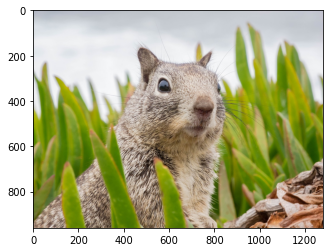

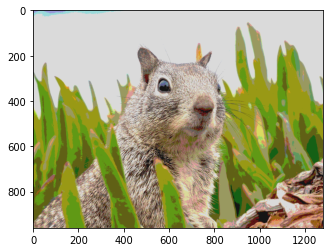

In [45]:
try:
    face = sp.face(gray=True)
except AttributeError:
    import matplotlib.image as mpimg
    face = mpimg.imread('example.png')
    
X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=4,n_init=1)
k_means.fit(X) 
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

plt.figure(1)
plt.imshow(face,  cmap='gray')

plt.figure(2)
plt.imshow(face_compressed,  cmap='gray')